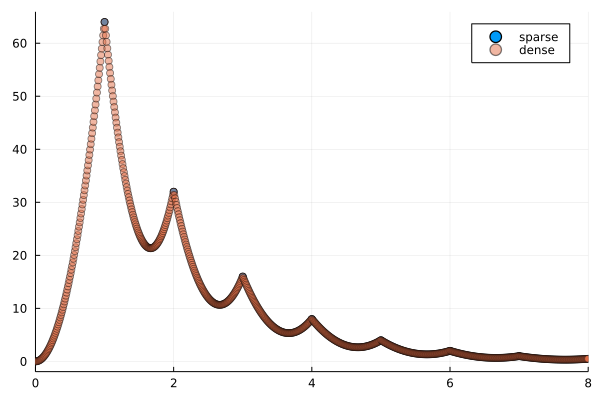

In [103]:
using Plots

function put_dense_between_sparse(sparse)
    sparse_xs      = sparse[1]
    sparse_ys      = sparse[2]
    dense_xs       = 0:0.01:8
    summed_ys      = zeros(length(dense_xs))
    for i in 1:length(sparse_xs)
        that_sparse    = sparse_xs[i],sparse_ys[i]
        that_x         = that_sparse[1]
        that_y         = that_sparse[2]
        gap_between_sparses = sparse_xs[2] - sparse_xs[1]
        dense_ys            = [that_y - that_y*((abs(that_x-x)/gap_between_sparses)) for x in dense_xs]
        zerod_dense_ys = []
        for i in 1:length(dense_ys)
            if dense_ys[i] >= 0
                push!(zerod_dense_ys, dense_ys[i])
            else
                push!(zerod_dense_ys, 0)
            end
        end
        decaying_ys = [y^2 for y in zerod_dense_ys]
        scaled_ys   = [y/that_y for y in decaying_ys]
        summed_ys   = summed_ys + scaled_ys
    end
    dense       = [dense_xs, summed_ys]    
    return dense
end
    
function test_put_dense_between_sparse()
    sparse     = [[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],[64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0, 0.5]] 
    dense      = put_dense_between_sparse(sparse)
    sparseg    = scatter(sparse[1],sparse[2], xlims=(0,8), label="sparse")
    denseg     = scatter!(dense[1],dense[2], label="dense", alpha=0.5)
end

test_put_dense_between_sparse()